In [117]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from itertools import cycle
from math import ceil
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
print("setup complete")

setup complete


In [2]:
sales = pd.read_csv('sales_data.csv', sep=';', decimal=',',\
                    index_col=0, parse_dates=True)

In [120]:
sales.head()

,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10
2014-07-31,6816,5158,9129,3139,4766,6470,4922,3551,3941,7466
2014-08-31,7123,5637,9705,3422,5098,6852,5211,3791,3895,7459
2014-09-30,6977,5548,9330,3370,5063,6682,5073,3574,3632,6972
2014-10-31,6706,5206,9200,3396,5176,6564,5150,3450,3467,6525
2014-11-30,6888,5288,9897,3302,5331,6852,5776,3565,3867,6651


In [139]:
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
C_1,63.0,9298.888889,1236.416363,6706.0,8365.0,9602.0,10138.5,11224.0
C_2,63.0,6867.238095,1292.025937,4998.0,5858.5,6609.0,7416.5,10026.0
C_3,63.0,13518.142857,1849.861109,9129.0,12519.5,13886.0,14983.0,16336.0
C_4,63.0,4958.428571,754.939598,3139.0,4537.5,5042.0,5546.5,6076.0
C_5,63.0,6760.095238,749.237865,4766.0,6377.0,6902.0,7252.0,8104.0
C_6,63.0,8714.507937,1003.096189,6470.0,8175.0,8706.0,9308.0,10916.0
C_7,63.0,7356.317460,1055.962546,4922.0,6677.5,7405.0,8079.5,9193.0
C_8,63.0,6221.000000,1762.789697,3450.0,4120.5,6682.0,7666.5,8715.0
C_9,63.0,7908.841270,2423.689997,3467.0,6061.5,8956.0,9376.0,12136.0
C_10,63.0,7761.746032,987.573876,6100.0,7049.0,7495.0,8562.0,10296.0


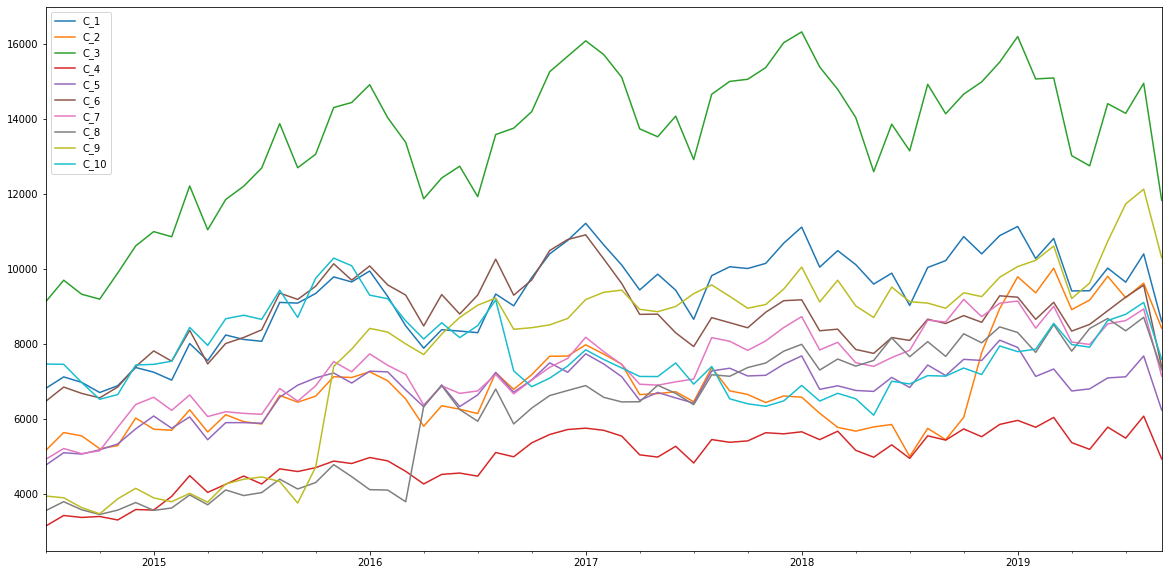

In [121]:
sales.plot(figsize=(20, 10))
plt.show()
# mooora clustering
# contribution prods mm categorie clustring
# KHASNA HEATMAP

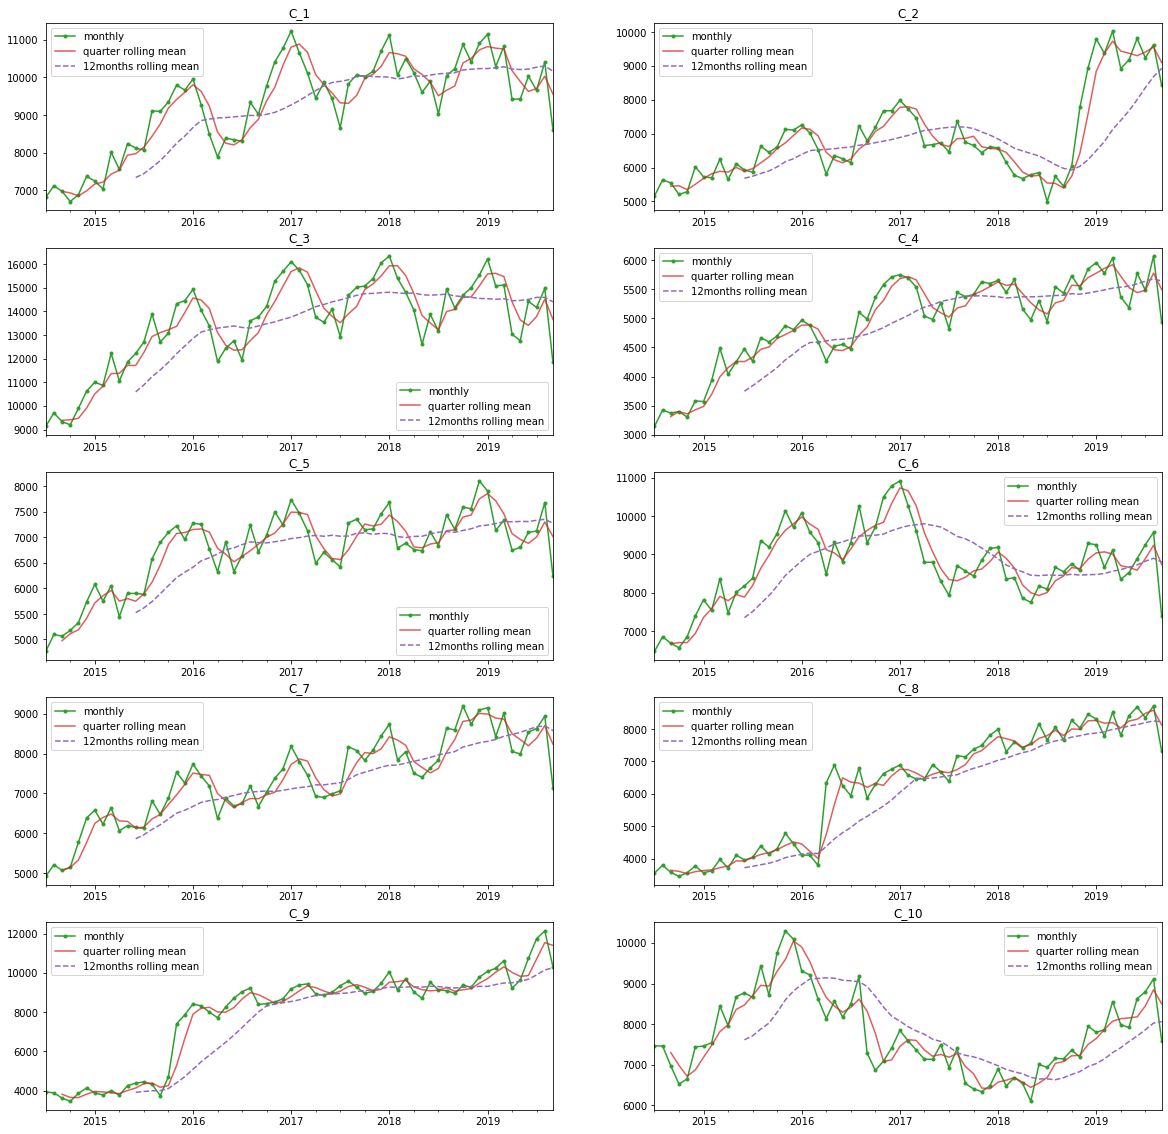

In [147]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
axs = axs.flatten()
# cols = [next(color_cycle), next(color_cycle), next(color_cycle)]
for i, item in enumerate(sales.columns):
    sales[item].plot(title=item,
                     color=cols[0],
                     ax=axs[i],
                     marker='.', label="monthly")
    sales[item].rolling(3).mean().plot(
                     color=cols[1],
                     ax=axs[i], label="quarter rolling mean", alpha=0.75)
    sales[item].rolling(12).mean().plot(
                     color=cols[2],
                     ax=axs[i], linestyle='--', label="12months rolling mean")
    axs[i].legend()

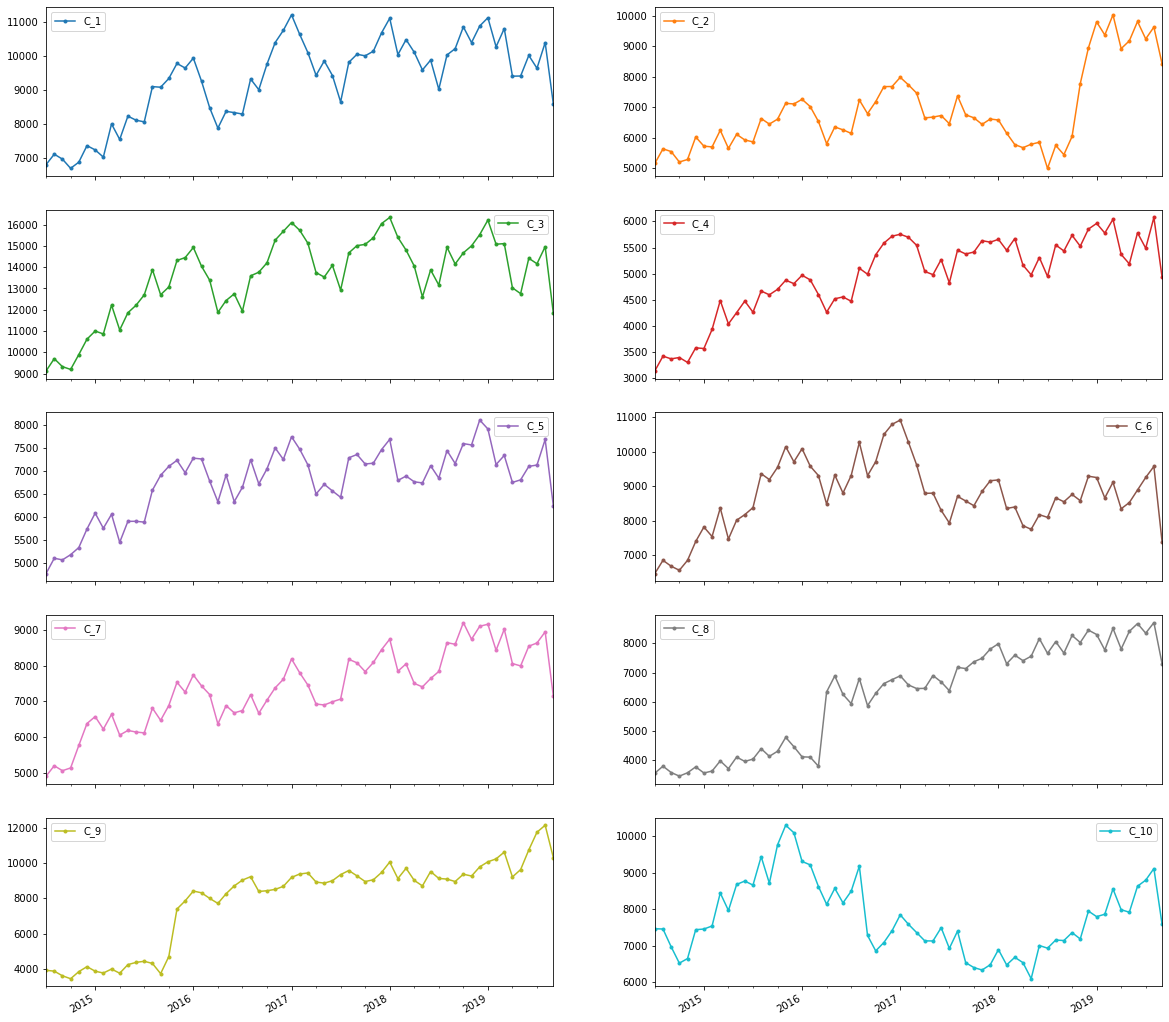

In [3]:
sales.plot(subplots=True,layout=(5,2),figsize=(20,20), marker='.')
plt.show()

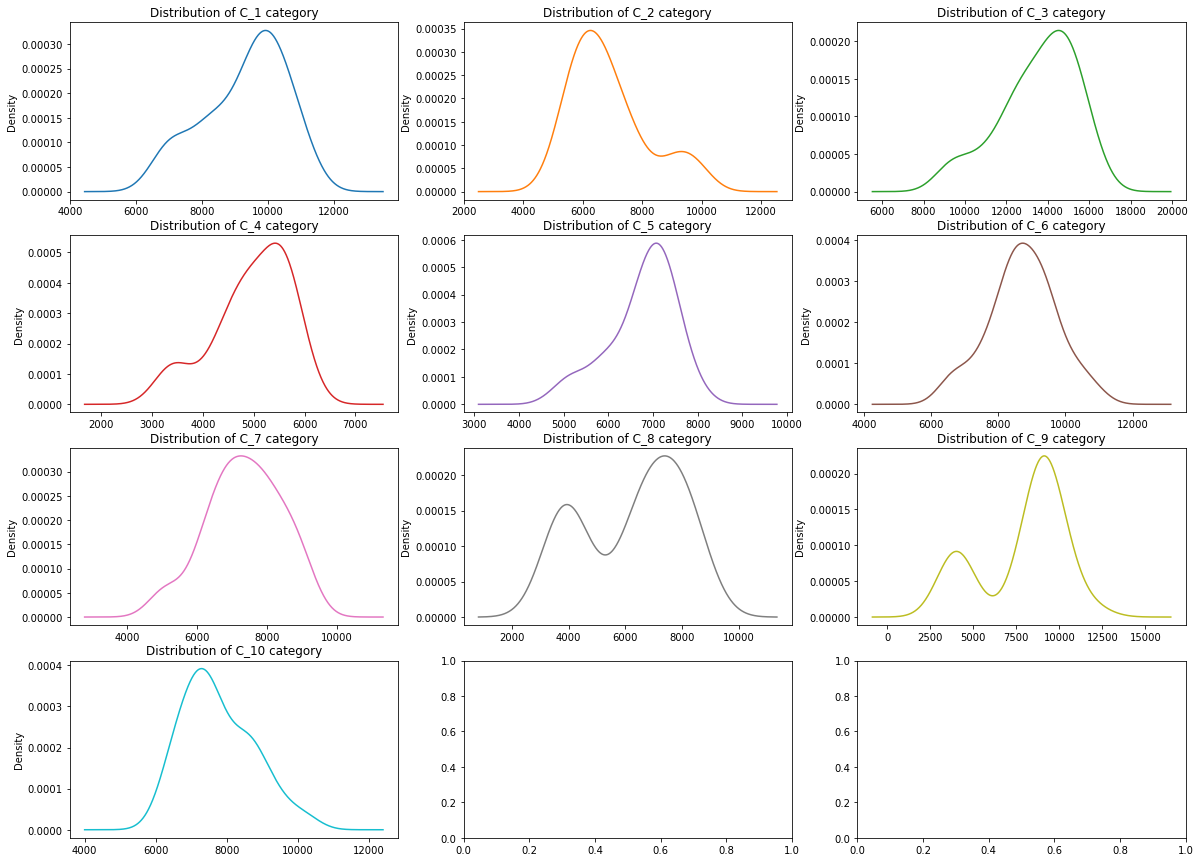

In [123]:
fig, axs = plt.subplots(4, 3, figsize=(20, 15))
axs = axs.flatten()
for i, item in enumerate(sales.columns):
    sales[item].plot(kind='density',
                         title=f'Distribution of {item} category',
                     color=next(color_cycle),
                     ax=axs[i])

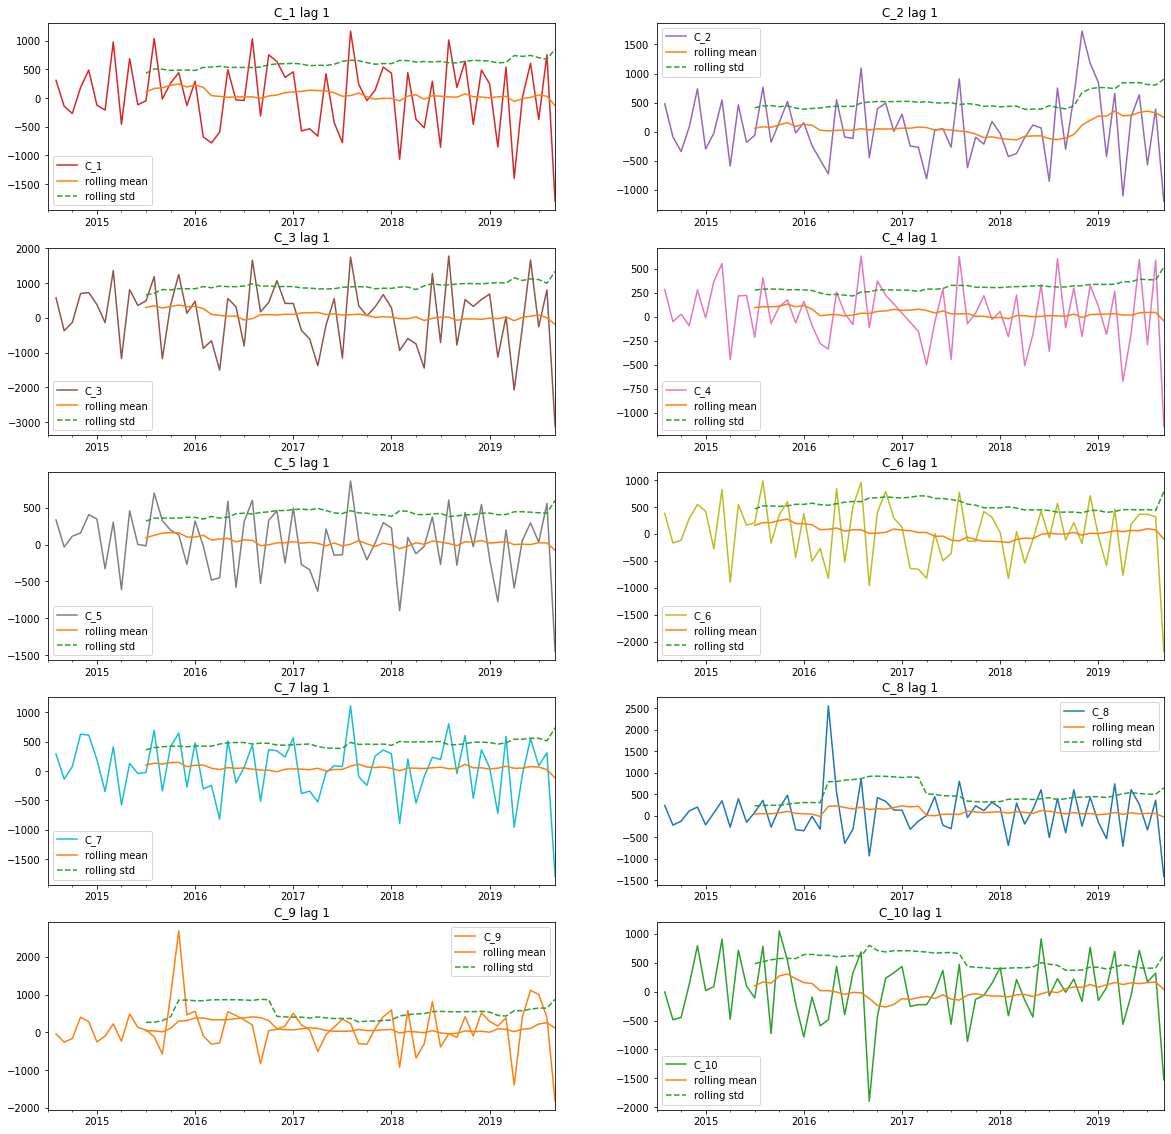

In [125]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
axs = axs.flatten()
for i, item in enumerate(sales.columns):
    sales[item].diff().plot(title=f"{item} lag 1",
                     color=next(color_cycle),
                     ax=axs[i])
    sales[item].diff().rolling(12).mean().plot(
                     color=cols[1],
                     ax=axs[i], label="rolling mean")
    sales[item].diff().rolling(12).std().plot(
                     color=cols[2],
                     ax=axs[i], linestyle='--', label="rolling std")
    axs[i].legend()

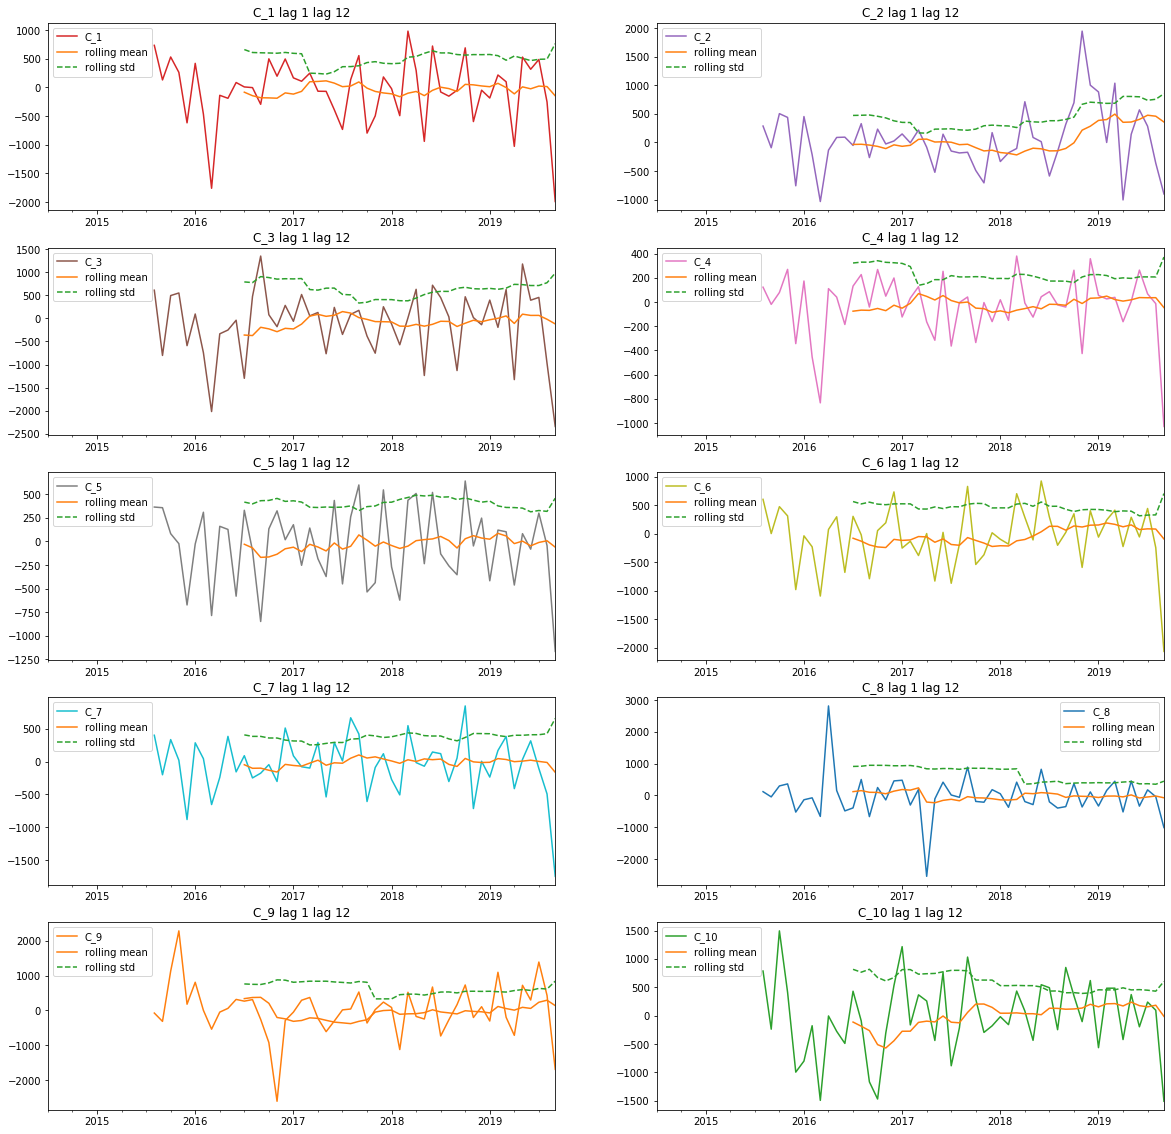

In [126]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20))
axs = axs.flatten()
for i, item in enumerate(sales.columns):
    sales[item].diff(1).diff(12).plot(title=f"{item} lag 1 lag 12",
                     color=next(color_cycle),
                     ax=axs[i])
    sales[item].diff(1).diff(12).rolling(12).mean().plot(
                     color=cols[1],
                     ax=axs[i], label="rolling mean")
    sales[item].diff(1).diff(12).rolling(12).std().plot(
                     color=cols[2],
                     ax=axs[i], linestyle='--', label="rolling std")
    axs[i].legend()

In [127]:
sales.index.month

Int64Index([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
            12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,
             5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9],
           dtype='int64')

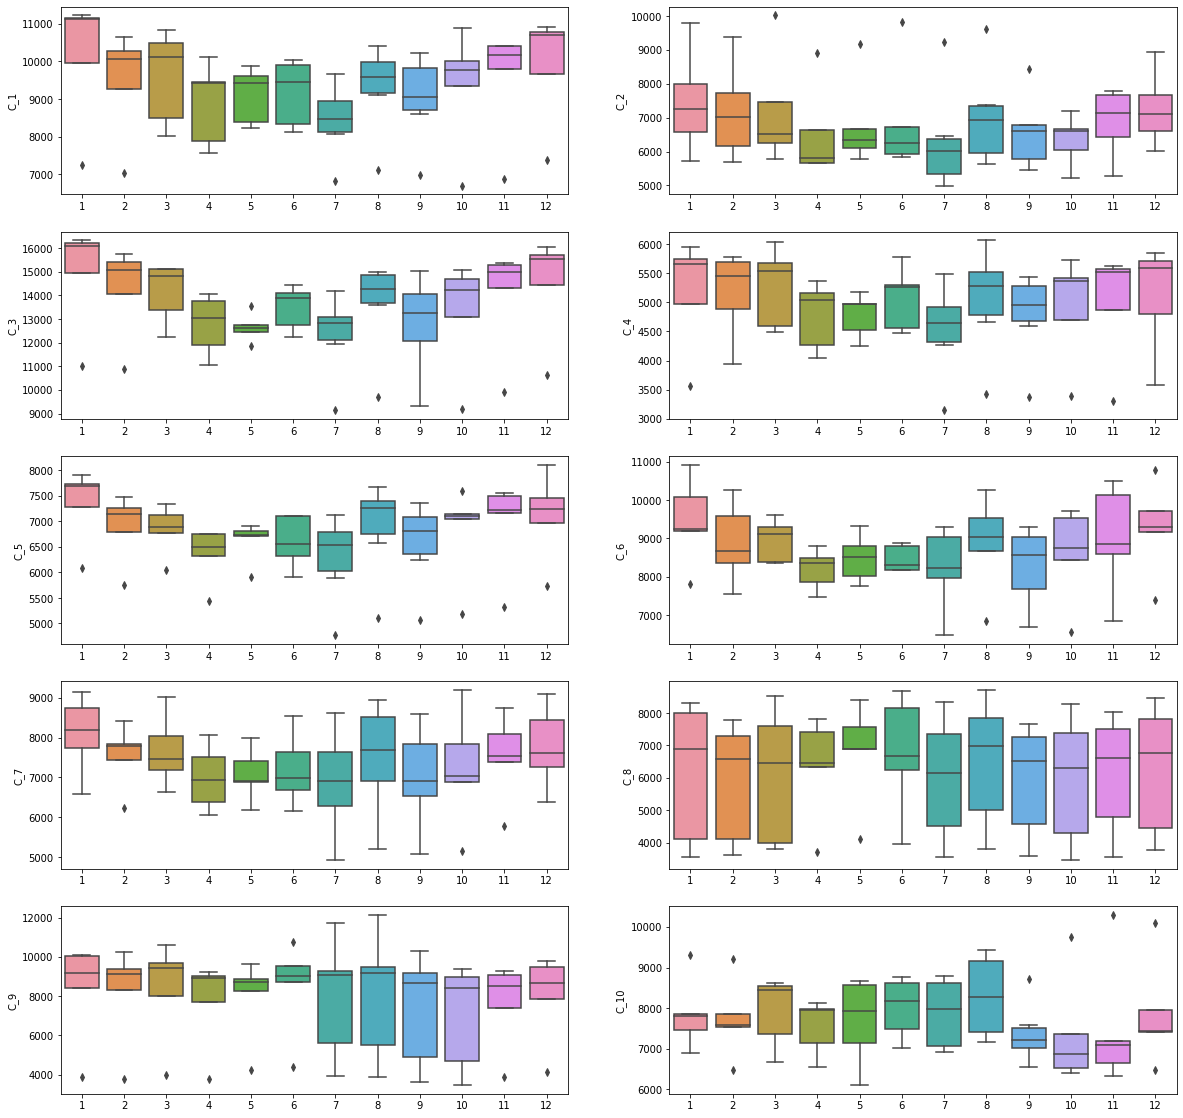

In [128]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
axes = axes.flatten()
for name, ax in zip(sales.columns, axes):
    sns.boxplot(data=sales, x=sales.index.month, y=name, ax=ax)

In [67]:
def plotseasonal(res, axes):
    res.observed.plot(ax=axes[0], legend=False, title=f"C_{plotseasonal.counter}")
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False)
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False, marker='o', linestyle='', markersize=5)
    axes[3].set_ylabel('Residual')
    plotseasonal.counter += 1
plotseasonal.counter=1
def grid_plotseasonal(df, ncol):
    nrow=ceil(10/ncol)*4
    fig, axes = plt.subplots(ncols=ncol, nrows=nrow, sharex=True, figsize=(15,1.5*nrow))
    k=0
    for i,col in enumerate(df.columns):
        res = seasonal_decompose(df[col].dropna(), period=12, filt=None)
        plotseasonal(res, axes[k:k+4, i%ncol])
        if (i%ncol)==(ncol-1) : k+=4
    plt.tight_layout()
    plt.show()

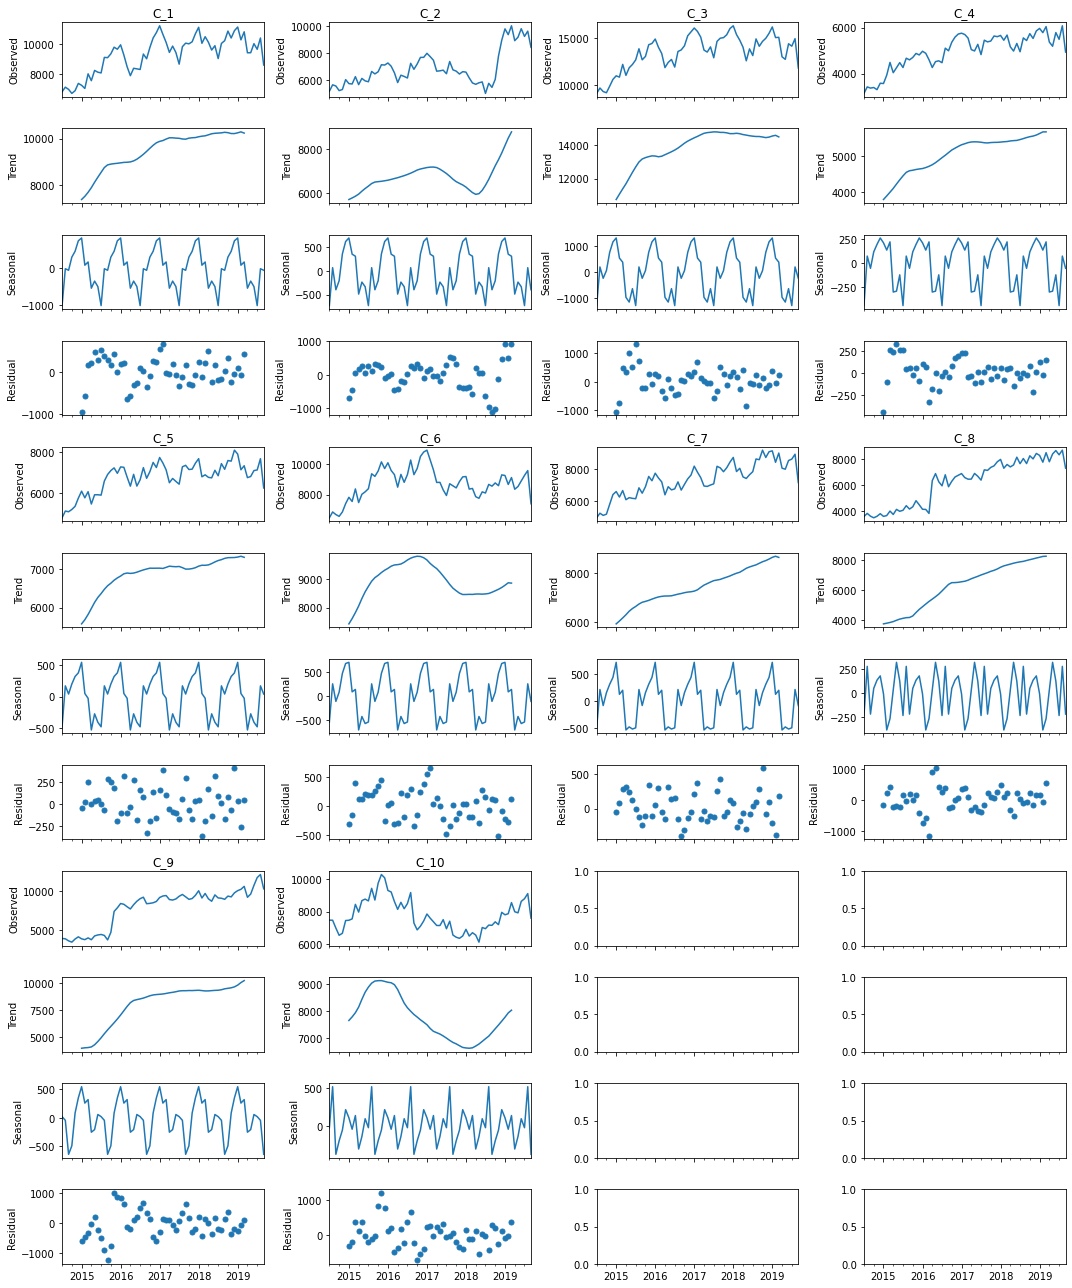

In [68]:
grid_plotseasonal(sales, ncol=4)

In [132]:
d = pd.DataFrame(0, index=sales.columns, columns=["RESMEAN","OBSMEAN","PERC"], dtype=float)
for col in sales.columns:
    result = seasonal_decompose(sales[col], period=12, model='additive')
    res, obs = result.resid, result.observed
    d.loc[col][:2] = list(map(lambda x: np.mean(np.abs(x)), (res, obs[~np.isnan(res)])))
d.PERC = d.RESMEAN*100/d.OBSMEAN
d.round(2)

,RESMEAN,OBSMEAN,PERC
C_1,267.48,9537.53,2.80
C_2,326.79,6756.51,4.84
C_3,327.56,13972.29,2.34
C_4,112.43,5085.02,2.21
C_5,150.68,6922.08,2.18
C_6,224.60,8945.43,2.51
C_7,181.39,7483.16,2.42
C_8,289.22,6292.82,4.60
C_9,349.65,8069.27,4.33
C_10,279.43,7773.47,3.59


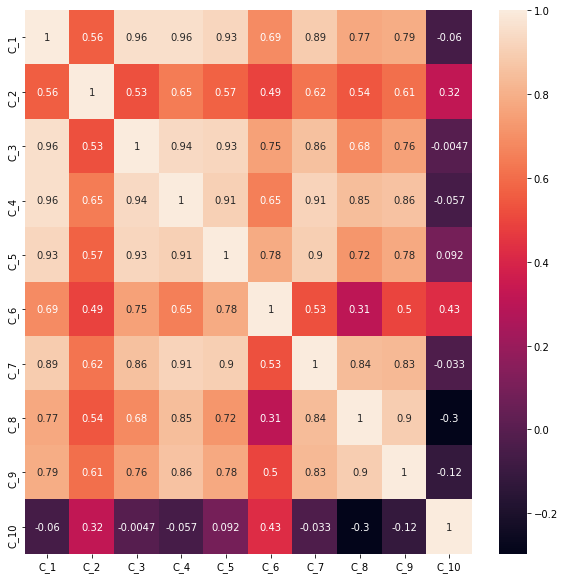

In [134]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(sales.corr(), annot=True)

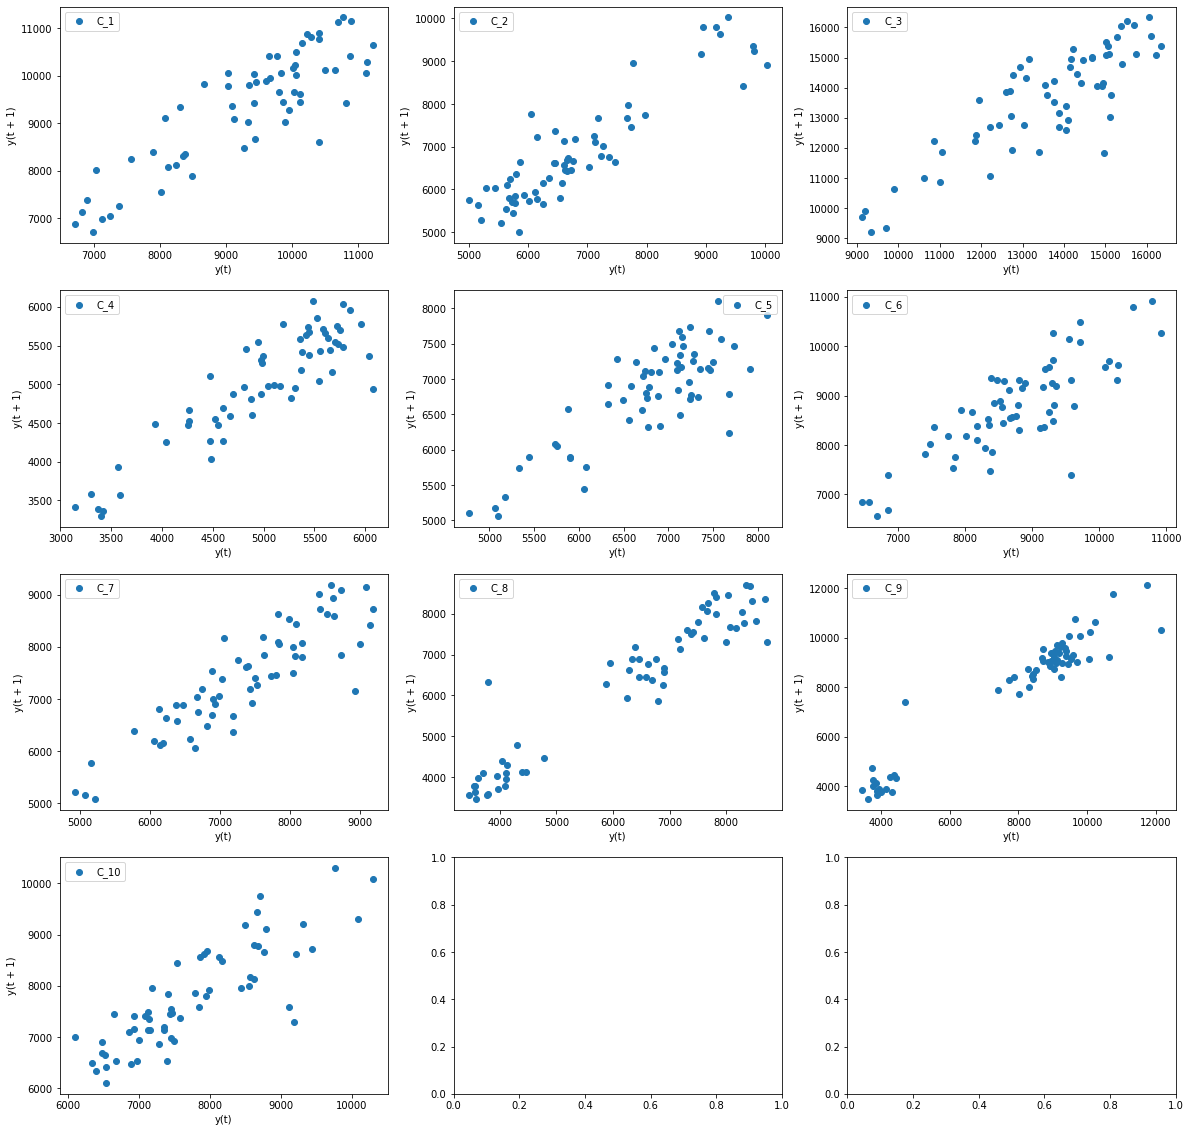

In [142]:
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
axes = axes.flatten()
for name, ax in zip(sales.columns, axes):
    lag_plot(sales[name], ax=ax, label=name)
    ax.legend()

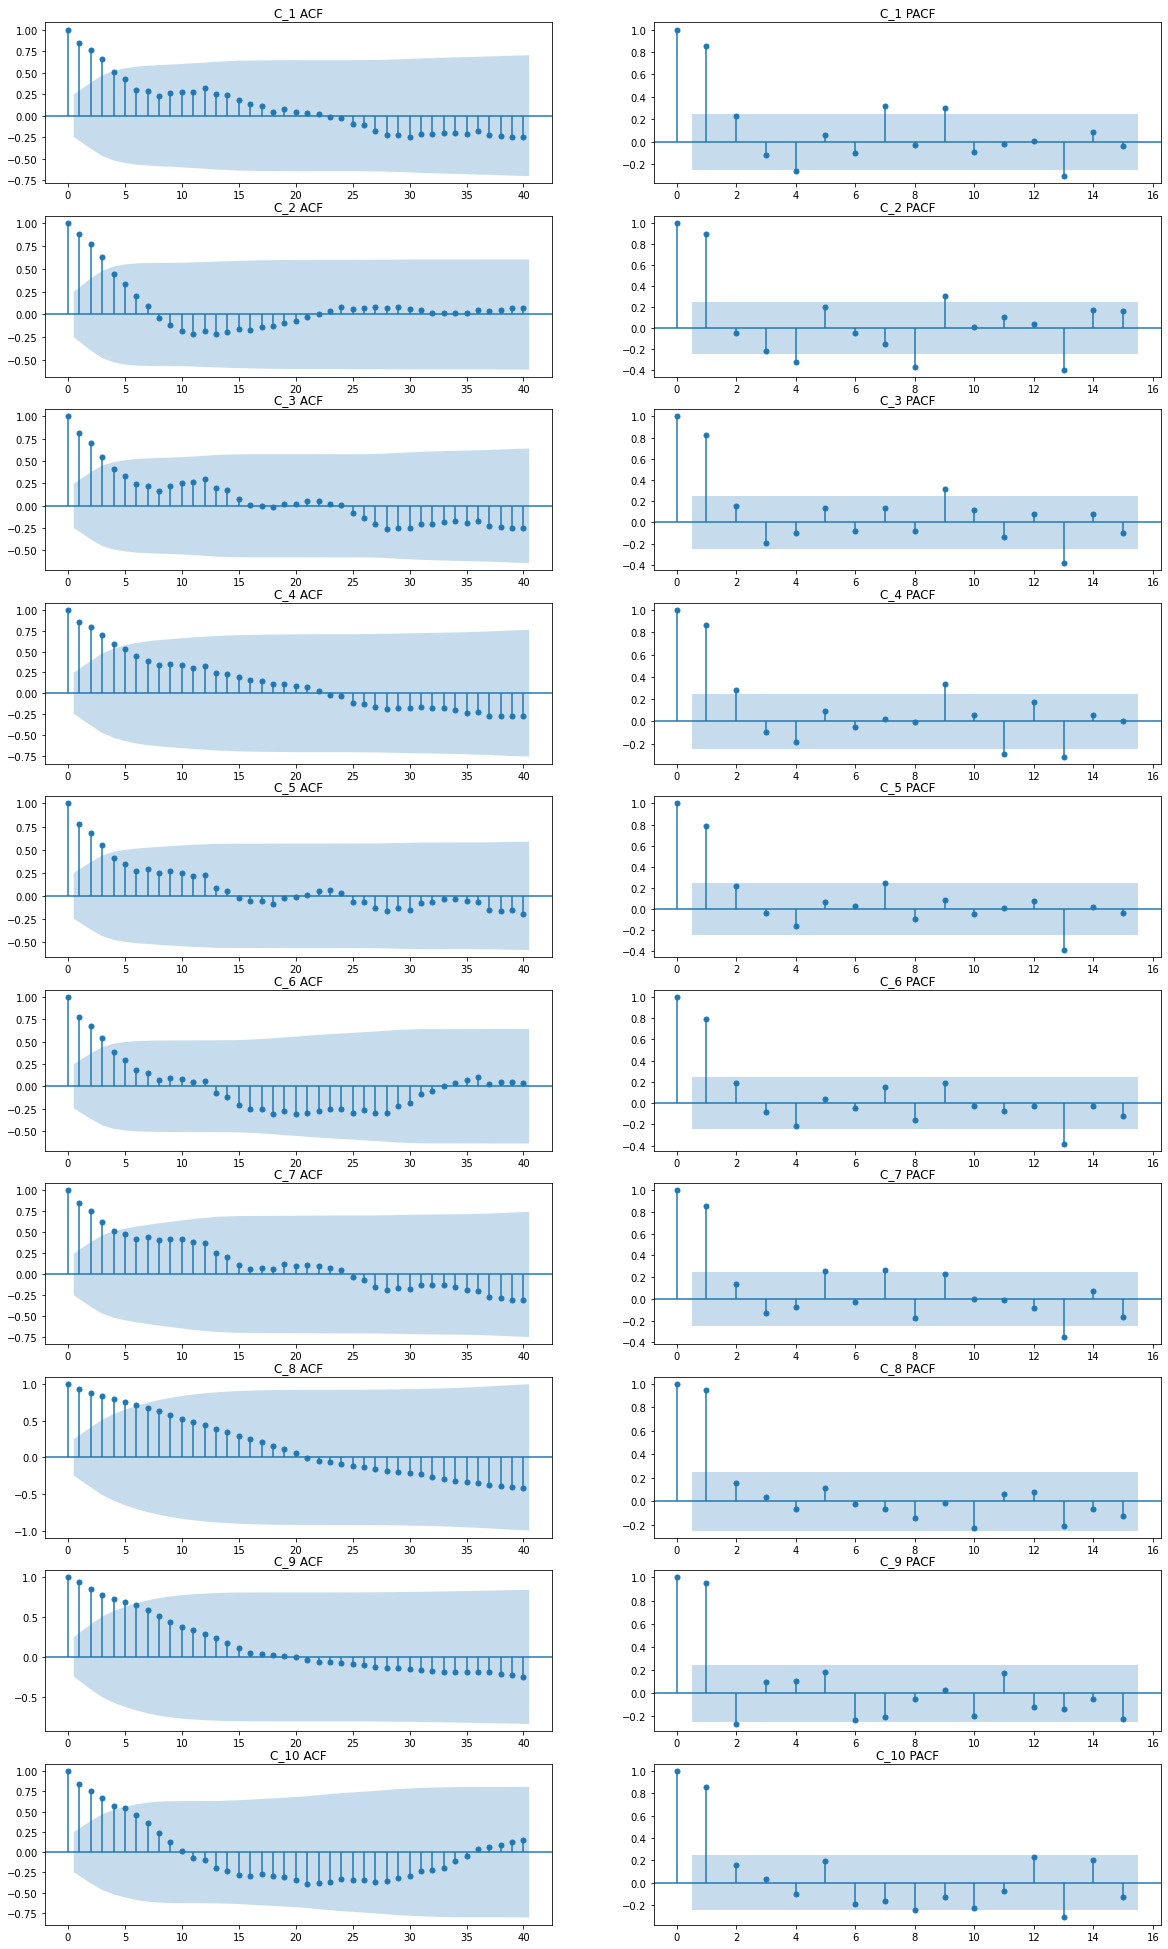

In [116]:
fig, axes = plt.subplots(10, 2, figsize=(20, 35), sharex=False)
alpha=.05
for i, col in enumerate(sales.columns):
    sm.graphics.tsa.plot_acf(sales[col].values.squeeze(), lags=40, ax=axes[i,0], title=f"{col} ACF", alpha=alpha)
    sm.graphics.tsa.plot_pacf(sales[col].values.squeeze(), lags=15, ax=axes[i,1], title=f"{col} PACF", alpha=alpha)

### Frome these resources : 

https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

https://learn.co/lessons/dsc-3-25-09-time-series-decomposition

In [118]:
# Import the check_stationarity function from previous lab
def stationarity_check(TS):
    # Calculate rolling statistics
    rolmean = TS.rolling(window = 8, center = False).mean()
    rolstd = TS.rolling(window = 8, center = False).std()
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS) # change the passengers column as required 
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    return None

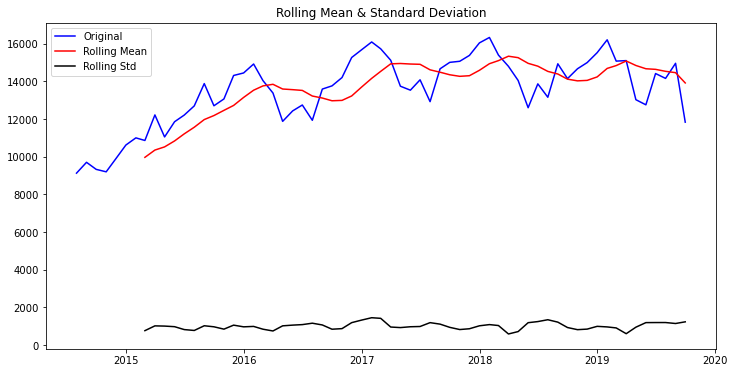

Results of Dickey-Fuller Test:
Test Statistic                 -4.376857
p-value                         0.000326
#Lags Used                     11.000000
Number of Observations Used    51.000000
Critical Value (1%)            -3.565624
Critical Value (5%)            -2.920142
Critical Value (10%)           -2.598015
dtype: float64


In [121]:
stationarity_check(sales.C_3)